# Neural Network (MNIST)

## Import Module

In [1]:
%matplotlib inline
from keras.datasets import mnist
from keras.utils import to_categorical
import math
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load Dataset

In [2]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [4]:
# X_train : Train dataset(Image feature data) / X_test : Test dataset(Image feature data)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [5]:
# y_train: Train dataset(label data) / y_test : Test dataset(label data)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


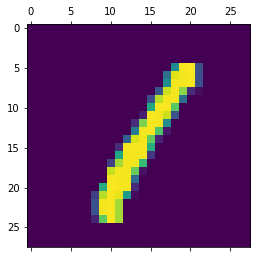

In [6]:
# Show Image of X_train[0]
plt.matshow(X_train[3].reshape(28, 28))

In [7]:
# Show result label of X_train[0] (=5)
y_train[3].argmax()

1

## Sigmoid Function

In [8]:
# For Calculating Cost (calculate value range from 0 to 1)
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.000123394575986
0.5
0.999876605424


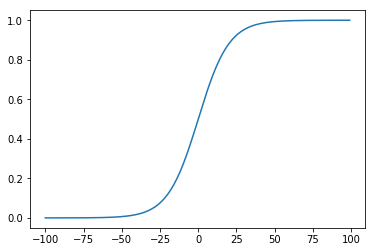

In [9]:
x = range(-100, 100)
y = [sigmoid(i/10) for i in x]
plt.plot(x, y)

## Gradient Descent

In [10]:
num_epoch = 10
learning_rate = 0.00001

In [11]:
# Parameter
w1 = np.random.uniform(low=-np.sqrt(6 / (784 + 500)), high=np.sqrt(6 / (784 + 500)), size=(784,500))
w2 = np.random.uniform(low=-np.sqrt(6 / (500 + 10)), high=np.sqrt(6 / (500 + 10)), size=(500,10))
b1 = np.random.uniform(low=-np.sqrt(6 / (1 + 500)), high=np.sqrt(6 / (1 + 500)), size=(1,500))
b2 = np.random.uniform(low=-np.sqrt(6 / (1 + 10)), high=np.sqrt(6 / (1 + 10)), size=(1,10))

In [12]:
for epoch in range(num_epoch):
    # Forward proporgation
    z2 = X_train.dot(w1) + b1
    a2 = sigmoid(z2)
    z3 = a2.dot(w2) + b2
    a3 = sigmoid(z3)
    
    # Calculating Error
    error = (y_train.argmax(axis=1) != (a3.argmax(axis=1))).mean()
    
    # Print Error
    if epoch % 1 == 0:
        print("{0:4} error = {1:.5f}".format(epoch, error))

    # Backward proporgation
    d3 = a3 - y_train
    d2 = d3.dot(w2.T) * a2 * (1 - a2)
    
    # Gradient Descent
    w2 = w2 - learning_rate * a2.T.dot(d3)
    w1 = w1 - learning_rate * X_train.T.dot(d2)
    b2 = b2 - learning_rate * d3.mean()
    b1 = b1 - learning_rate * d2.mean()

   0 error = 0.89212


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


   1 error = 0.90965
   2 error = 0.90965
   3 error = 0.90965
   4 error = 0.90513
   5 error = 0.89558
   6 error = 0.83293
   7 error = 0.90128
   8 error = 0.90128
   9 error = 0.90263


## Train

In [13]:
# Predict using calculated parameter
y_predict = X_train.dot(w1) + b1
y_predict = sigmoid(y_predict)
y_predict = y_predict.dot(w2) + b2
y_predict = sigmoid(y_predict)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Make Result Dataframe
actual = y_train.argmax(axis=1)
predict = y_predict.argmax(axis=1)

pd.DataFrame({'actual': actual, 'predict': predict}).head(10)

,actual,predict
0,5,4
1,0,4
2,4,4
3,1,4
4,9,4
5,2,4
6,1,4
7,3,4
8,1,3
9,4,4


## Test

In [16]:
# Predict using calculated parameter
y_predict = X_test.dot(w1) + b1
y_predict = sigmoid(y_predict)
y_predict = y_predict.dot(w2) + b2
y_predict = sigmoid(y_predict)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Make Result Dataframe
actual = y_test.argmax(axis=1)
predict = y_predict.argmax(axis=1)

result = pd.DataFrame({'actual': actual, 'predict': predict})
result.head(10)

,actual,predict
0,7,4
1,2,4
2,1,4
3,0,4
4,4,4
5,1,4
6,4,4
7,9,4
8,5,4
9,9,4


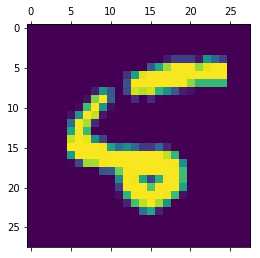

In [18]:
# Print Error
plt.matshow(X_test[8].reshape(28, 28))

In [19]:
# Calculating accuracy
accuracy = []

for i in range(10):
    chunk = result[result["actual"] == i]
    accuracy.append((chunk["actual"] == chunk["predict"]).mean())

In [20]:
result = pd.DataFrame({'accuracy' : accuracy})
result

,accuracy
0,0.000000
1,0.000000
2,0.000000
3,0.014851
4,1.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


## Score

In [21]:
_url = "https://jinheon-azureml-score.azurewebsites.net/api/Neural-Network-Score?code=Ka/e9jgDW7wtN7iwjVbwHAeQlaiS0ABPPcJC92aVwxP2NtWbBwwRpw=="

In [22]:
json = {
    "name": "Jinheon",
    "score": result['accuracy'].mean()
}

In [23]:
req = requests.request('POST', _url, json = json)

In [24]:
print(req.json())

Hi Jinheon, Your score is 0.10148514851485149
